### EDA по стриминговому сервису Netflix в разных регионах
Данные взяты с: https://www.comparitech.com/blog/vpn-privacy/countries-netflix-cost/

https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?year_high_desc=true


In [121]:
import pandas as pd
import matplotlib.pyplot as pyplot
from scipy.interpolate import interp1d

In [122]:
netflix_basic_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=0&format=csv')
netflix_standard_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=720312140&format=csv')
netflix_premium_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=41907226&format=csv')
netflix_pivot_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=481487463&format=csv')

In [142]:
netflix_basic_data

,Country,Basic,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,Unnamed: 9,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
0,Turkey,26.99,TRY,USD,1.97,2930.0,1709.0,4639.0,0.00043,NaN,123.76,146.85,0.00,118.52,163.41,0.00
1,India,199.00,INR,USD,2.64,3718.0,2125.0,5843.0,0.00045,NaN,104.19,131.97,-28.87,114.56,161.37,-6.00
2,Argentina,379.00,ARS,USD,3.74,3154.0,1606.0,4760.0,0.00079,NaN,76.63,110.04,-61.77,71.72,137.32,-59.43
3,Colombia,16900.00,COP,USD,4.31,3156.0,1835.0,4991.0,0.00086,NaN,64.12,99.69,-74.39,63.26,132.11,-68.01
4,Brazil,25.90,BRL,USD,4.61,3162.0,1810.0,4972.0,0.00093,NaN,58.00,94.53,-80.14,56.77,127.99,-74.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Liechtenstein,11.90,CHF,USD,12.88,1712.0,1336.0,3048.0,0.00423,NaN,-42.33,0.00,-146.85,-87.03,0.00,-163.41
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Average,NaN,NaN,NaN,8.38,NaN,NaN,5314.0,0.00166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Minimum,NaN,NaN,NaN,1.97,NaN,NaN,2274.0,0.00043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
ppp_data = pd.read_excel('https://github.com/nerdmaid/Pandas/blob/main/ppp_per_capita.xls?raw=true')

In [125]:
ppp_data

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,32625.492691,34324.799359,33567.550017,36829.032774,36779.429429,37311.750320,37585.025079,38897.122666,NaN,NaN,NaN
1,Africa Eastern and Southern,3214.969758,3320.493308,3235.163359,3362.868809,3499.132878,3527.164192,3620.921502,3697.459305,3786.357310,3836.571430,3677.111255
2,Afghanistan,1710.575411,1699.488110,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2077.874554
3,Africa Western and Central,3532.142986,3675.392441,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.815774,4335.199547,4240.534782
4,Angola,6587.986939,6710.750623,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6443.032680
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,7230.205130,7780.594464,8039.207976,8383.397311,8649.449499,9357.135136,10007.689234,10436.168846,11013.397081,11797.119317,11383.404733
262,"Yemen, Rep.",4162.088631,3607.090566,3491.204610,3688.519409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,12912.125030,13393.766885,13215.708679,13606.942896,13602.102643,13701.945390,13748.461416,13860.270166,14209.093833,14289.760003,13355.598709
264,Zambia,3178.872330,3323.937623,3422.619937,3578.847055,3539.436390,3430.400287,3404.673990,3485.021780,3606.097632,3617.200014,3456.322534


В данных РРР по странам некоторые названия стран не совпадают с данными из таблицы Netflix, также не хватает данных по некоторым странам, добавим их вручную

In [126]:
wrong = ['Korea', 'Hong Kong SAR', 'Taiwan Province of China', 'Slovak Republic', 'Russian Federation']
right = ['South Korea', 'Hong Kong', 'Taiwan', 'Slovakia', 'Russia']
for i in range(len(wrong)):
    ppp_data['Country'] = ppp_data['Country'].str.replace(wrong[i], right[i])
    

In [127]:
merged_data = pd. merge(netflix_basic_data, ppp_data, left_on='Country', right_on='Country')

In [128]:
merged_data = merged_data.dropna(subset=['Country'])
merged_data = merged_data.dropna(subset=['2020'])

merged_data['2020'] = pd.to_numeric(merged_data['2020'])
additional_data = pd.DataFrame([{'Country':'Monaco', '2020':115700}, {'Country':'Gibraltar', '2020':61700}, 
                   {'Country':'Liechtenstein', '2020':139100}])
merged_data = pd.concat([merged_data, additional_data])


#### Построим график корреляции между GDP (PPP) и ценой базовой подписки Netflix

In [129]:
%matplotlib inline

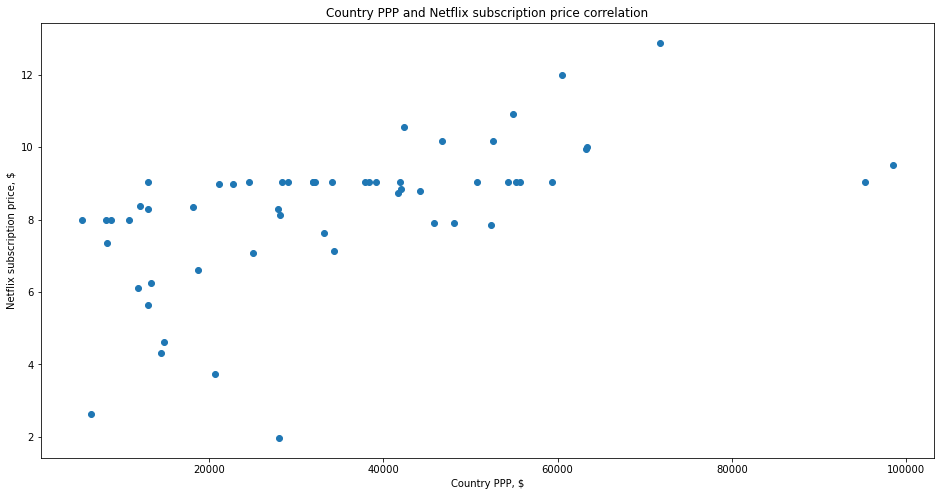

In [130]:
pyplot.figure(figsize=(16, 8))
pyplot.scatter(merged_data['2020'], merged_data['Price USD'])
pyplot.title('Country PPP and Netflix subscription price correlation')
pyplot.ylabel('Netflix subscription price, $')
pyplot.xlabel('Country PPP, $')
pyplot.show()

Как мы видим, цена базовой подписки несколько связана с GDP (PPP) в стране

Давайте взглянем на среднюю цену подписки(базовой, стандартной, премиум) в зависимости от валюты страны

In [131]:
netflix_pivot_data = netflix_pivot_data.merge(netflix_basic_data[['Price USD','Country']], on='Country')
netflix_pivot_data = netflix_pivot_data.merge(netflix_standard_data[['Price USD','Country']], on='Country', suffixes=(None, '_standard'))
netflix_pivot_data = netflix_pivot_data.merge(netflix_premium_data[['Price USD','Country']], on='Country', suffixes=(None, '_premium'))

In [132]:
netflix_pivot_data

,Country,Mobile,Basic,Standard,Premium,Unnamed: 5,Price USD,Price USD_standard,Price USD_premium
0,Argentina,NaN,379.00,639.00,939.00,ARS,3.74,6.30,9.26
1,Australia,NaN,10.99,16.99,22.99,AUS,7.84,12.12,16.39
2,Austria,NaN,7.99,12.99,17.99,EUR,9.03,14.67,20.32
3,Belgium,NaN,8.99,13.49,17.99,EUR,10.16,15.24,20.32
4,Bolivia,NaN,7.99,10.99,13.99,USD,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...,...
59,Ukraine,NaN,4.99,7.49,9.99,EUR,5.64,8.46,11.29
60,United Kingdom,NaN,5.99,9.99,13.99,GBP,7.91,13.20,18.48
61,United States,NaN,9.99,15.49,19.99,USD,9.99,15.49,19.99
62,Uruguay,NaN,8.99,12.99,15.99,USD,8.99,12.99,15.99


In [133]:
netflix_pivot_data[['Unnamed: 5', 'Price USD', 'Price USD_standard', 'Price USD_premium']].groupby('Unnamed: 5').mean().round(2)

,Price USD,Price USD_standard,Price USD_premium
Unnamed: 5,,,
ARS,3.74,6.30,9.26
AUS,7.84,12.12,16.39
BRL,4.61,7.11,9.96
CAD,7.91,13.05,16.61
CHF,12.88,20.46,26.96
CLP,7.07,9.91,12.74
COP,4.31,6.86,9.93
CZK,8.83,11.49,14.15
DKK,12.00,15.04,19.60


Теперь посмотрим на  среднюю цену подписки(базовой, стандартной, премиум) по континентам

In [134]:
pivot_by_region = netflix_pivot_data.copy(deep=True)
countries = [['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador',
              'Guatemala', 'Honduras', 'Mexico', 'Peru', 'Paraguay', 'Uruguay', 'Venezuela'], 
            ['Australia', 'New Zealand'], ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic',
            'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 
            'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lietchenstein', 'Lithuania', 'Moldova', 'Monaco',
            'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Slovakia',
                                           'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
             ['Canada', 'United States'], ['Hong Kong', 'India', 'Indonesia', 'Israel', 'Japan', 'Malaysia',
             'Philippines', 'Singapore', 'South Korea', 'Taiwan', 'Thailand', 'Turkey'],
             ['South Africa']
            ]
regions = ['South America', 'Australia and Oceania', 'Europe', 'North America', 'Asia', 'Africa']
for i in range(len(countries)):
    pivot_by_region['Country'] = pivot_by_region['Country'].replace(countries[i], regions[i])


In [135]:
pivot_by_region[['Country', 'Price USD', 'Price USD_standard', 'Price USD_premium']].groupby('Country').mean().round(2)

,Price USD,Price USD_standard,Price USD_premium
Country,,,
Africa,6.26,10.05,12.58
Asia,7.64,10.62,13.21
Australia and Oceania,8.32,12.32,16.66
Europe,9.12,13.09,17.26
North America,8.95,14.27,18.30
South America,7.05,10.11,13.13


#### Посмотрим, какой процент составляет подписка разного уровня относительно GDP (PPP). Для примера рассмотрим Чехию и Россию

In [136]:
chech_data = netflix_pivot_data[netflix_pivot_data['Country']=='Czech Republic']
chech_data = chech_data[['Price USD', 'Price USD_standard', 'Price USD_premium']]
chech_data.reset_index(drop=True, inplace=True)
check_monthly_ppp = merged_data[merged_data['Country']=='Czech Republic']['2020']/12

In [139]:
chech_data.apply(
        lambda column_value: float(column_value) * 100 / check_monthly_ppp
    )


,Price USD,Price USD_standard,Price USD_premium
10,0.251991,0.327902,0.403813


In [140]:
rus_data = netflix_pivot_data[netflix_pivot_data['Country']=='Russia']
rus_data = rus_data[['Price USD', 'Price USD_standard', 'Price USD_premium']]
rus_data.reset_index(drop=True, inplace=True)
check_monthly_ppp = merged_data[merged_data['Country']=='Russia']['2020']/12

In [141]:
rus_data.apply(
        lambda column_value: float(column_value) * 100 / check_monthly_ppp
    )


,Price USD,Price USD_standard,Price USD_premium
25,0.345793,0.461057,0.576746


#### Какие топ-5 стран имеют самую большую доступную коллекцию тв-шоу?


In [144]:
netflix_basic_data.sort_values('# of TV Shows', ascending=False)[:5]

,Country,Basic,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,Unnamed: 9,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
10,Czech Republic,199.00,CZK,USD,8.83,5234.0,2091.0,7325.0,0.00121,NaN,-5.18,37.35,-126.90,31.95,111.25,-95.62
14,Slovakia,7.99,EUR,USD,9.03,5055.0,1980.0,7035.0,0.00128,NaN,-7.40,35.21,-128.22,25.82,106.85,-100.38
16,Bulgaria,7.99,EUR,USD,9.03,4819.0,1978.0,6797.0,0.00133,NaN,-7.40,35.21,-128.22,22.43,104.37,-102.93
7,Hungary,2490.00,HUF,USD,7.64,4802.0,2082.0,6884.0,0.00111,NaN,9.21,51.04,-117.91,39.88,116.78,-89.18
9,United Kingdom,5.99,GBP,USD,7.91,4551.0,2092.0,6643.0,0.00119,NaN,5.74,47.78,-120.15,33.07,112.04,-94.73


#### На каком месте будет Россия, если отсортировать страны по эффективности базовой подписки (Cost Per Title)


In [149]:
sorted_for_cpt = netflix_basic_data.sort_values('Price per Title')
sorted_for_cpt.reset_index(drop=True, inplace=True)

In [151]:
sorted_for_cpt[sorted_for_cpt['Country']=='Russia']

,Country,Basic,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,Unnamed: 9,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
26,Russia,599.0,RUB,USD,8.13,3624.0,2087.0,5711.0,0.00142,NaN,3.08,45.26,-121.84,15.56,99.24,-107.94


Россия на 27 месте (т.к. индекс начинается с 0)

#### В какой стране подписка на Netflix стоит меньше всего?


In [153]:
netflix_basic_data.sort_values('Price USD')[:1]

,Country,Basic,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,Unnamed: 9,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
0,Turkey,26.99,TRY,USD,1.97,2930.0,1709.0,4639.0,0.00043,NaN,123.76,146.85,0.0,118.52,163.41,0.0


In [154]:
netflix_standard_data.sort_values('Price USD')[:1]

,Country,Standard,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,Unnamed: 9,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
0,Turkey,40.99,TRY,USD,3.0,2930.0,1709.0,4639.0,0.00032,NaN,120.42,148.88,0.0,114.95,164.87,0.0


In [155]:
netflix_premium_data.sort_values('Price USD')[:1]

,Country,Premium,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Average Total Library Size,Price per Title,Unnamed: 9,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
0,Turkey,54.99,TRY,USD,4.02,2930.0,1709.0,4639.0,0.00022,NaN,118.48,148.07,0.0,112.97,164.29,0.0


По всем трем тарифам дешевле всего подписка стоит в Турции